<a href="https://colab.research.google.com/github/lurwan2107/ArewaDS_DeepLearning/blob/main/04_PyTorch_CustomData_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 04_PyTorch_Custom_Data_Exercise:
This notebook contains all the solutions on pytorch custom data exercise, submtted by:

In [33]:
# Checking the version of PyTorch and setting up divice agnostic code
import torch
import torch as nn

print(torch.__version__)

device = 'cuda' if torch.cuda.is_available else 'cpu'
device

2.1.0+cu121


'cuda'

### Q1. Our models are underperforming (not fitting the data well). What are 3 methods for preventing underfitting? Write them down and explain each with a sentence.

Answer:
- **Decrease regularization:** Regularization is typically used to reduce the variance with a model by applying a penalty to the input parameters with the larger coefficients.
- **Increase the duration of training:** Stopping training too soon can also result in underfit model. Therefore, by extending the duration of training, it can be avoided.
- **Feature selection:** If there are not enough predictive features present, then more features or features with greater importance, should be introduced.

### Q2. Recreate the data loading functions we built in sections 1, 2, 3 and 4. You should have train and test `DataLoader's` ready to use.

In [2]:
import requests
import zipfile
from pathlib import Path

# Setting up path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

    # Downloading pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzipping pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...")
        zip_ref.extractall(image_path)

Did not find data/pizza_steak_sushi directory, creating one...
Unzipping pizza, steak, sushi data...


Dataset downloaded! Time to become one with it

In [3]:
# Creating function using (os_walk) to get information out of just downloaded dataset
import os

def walk_through_di(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}.'")

walk_through_di(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi.'
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train.'
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza.'
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi.'
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak.'
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test.'
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza.'
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi.'
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak.'


Since we now know the status of our dataset let's setup our training and testing path!

In [4]:
# Setting up train and test path
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

Let's visualize single image default python PIL

Random image path: data/pizza_steak_sushi/train/pizza/3018077.jpg
Image class: pizza
Image height: 512
Image width: 512


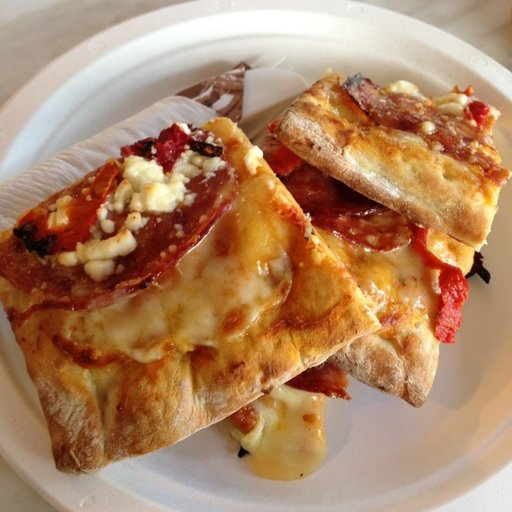

In [5]:
# Visualizing the image with PIL (python image library)
import random
from PIL import Image

# Setting random seed to 42
random.seed(42)

# 1. Getting all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Getting random image path
random_image_path = random.choice(image_path_list)

# 3. Getting image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Opening image
img = Image.open(random_image_path)

# 5. Printing metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

Let's do the same thing with matplotlib

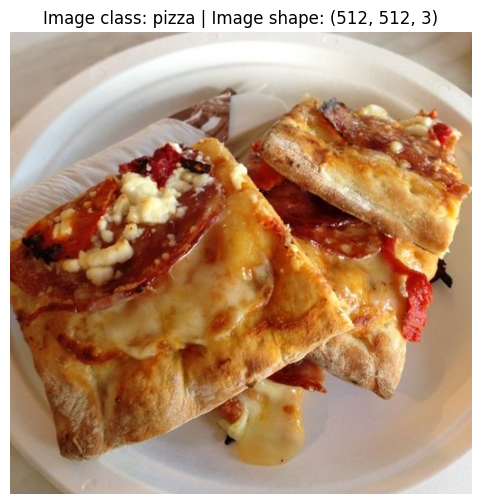

In [6]:
# Visualizing the image with matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Turning the image into an array
img_as_array = np.asarray(img)

# Plotting the converted image with matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape}")
plt.axis(False);

Let's transform our images by turning the into tensors!

In [7]:
# Importing the necessary dedpendancies
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Using (torchvision.ttransform.compose) to transform the image

data_transform = transforms.Compose([
    # Resizing the images to 64x64
    transforms.Resize(size=(64, 64)),
    # Flipping the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),
    # Turning the image into a torch.Tensor
    transforms.ToTensor()
])

Let's write a function to visualize the transformed image

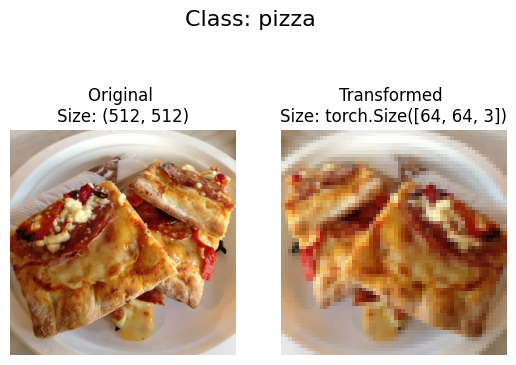

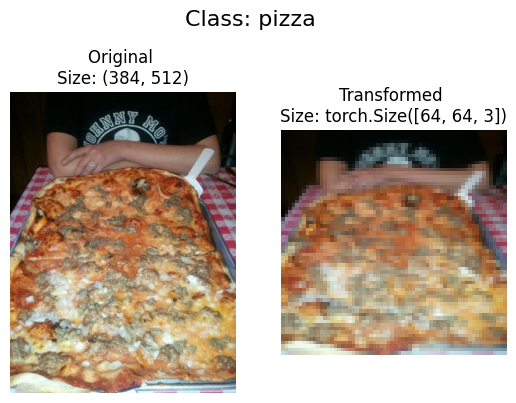

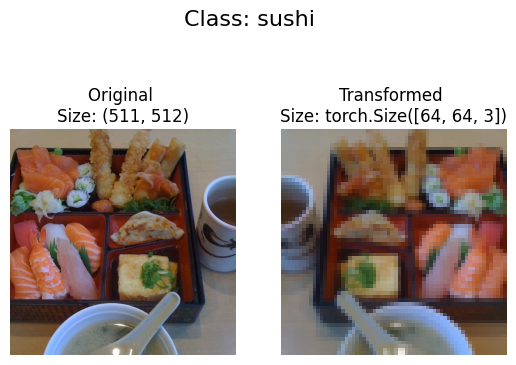

In [8]:
# Function for visalizing transformed image
def plot_transformed_images(image_paths, transform, n=3, seed=42):

    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image, however we will use permute() method
            # to compatible to matplotlib
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list,
                        transform=data_transform,
                        n=3)

### Let's load our image data using `ImageFolder`

In [9]:
# Using ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir, # target folder of images
                                  transform=data_transform, # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [10]:
# Getting class names as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [11]:
# Getting class names as a dictionary as well
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [12]:
# Checking the lengths if the train and test data
len(train_data), len(test_data)

(225, 75)

In [13]:
# Turning train and test Datasets into DataLoaders
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=1, # how many samples per batch?
                              num_workers=1, # how many subprocesses to use for data loading? (higher = more)
                              shuffle=True) # shuffle the data?

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=1,
                             num_workers=1,
                             shuffle=False) # don't usually need to shuffle testing data

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7d0026ac7e20>,
 <torch.utils.data.dataloader.DataLoader at 0x7d0026ac5810>)

In [14]:
# How many batches of images are in our data loaders?
img, label = next(iter(train_dataloader))
print(f"Image shape: {img.shape} ")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 64, 64]) 
Label shape: torch.Size([1])


### Q3. Recreate `model_0` we built in section 7.

In [15]:
# Recreating the model_0
from torch import nn
class TinyVGG(nn.Module):

    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1), # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        #print(x.shape)
        x = self.conv_block_2(x)
        #print(x.shape)
        x = self.classifier(x)
        #print(x.shape)
        return x
        # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # <- leverage the benefits of operator fusion

torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

### Q4. Create training and testing functions for `model_0`.

In [16]:
# Creating training loop
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [17]:
# Creating testing loop
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [18]:
# Creating train() to combine both our trainin_step and testing_step functions
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)

      # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

### Q5. Try training the model you made in exercise 3 for 5, 20 and 50 epochs, what happens to the results?
- Use `torch.optim.Adam()` with a learning rate of 0.001 as the optimizer.

`(a)` Training the `model_0` for 5 epoch:

In [19]:
# Training for 5 epoch
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1177 | train_acc: 0.2978 | test_loss: 1.0970 | test_acc: 0.3333
Epoch: 2 | train_loss: 1.0999 | train_acc: 0.2978 | test_loss: 1.0994 | test_acc: 0.2533
Epoch: 3 | train_loss: 1.0992 | train_acc: 0.3200 | test_loss: 1.0996 | test_acc: 0.3333
Epoch: 4 | train_loss: 1.0989 | train_acc: 0.3244 | test_loss: 1.0998 | test_acc: 0.3333
Epoch: 5 | train_loss: 1.0988 | train_acc: 0.3244 | test_loss: 1.0999 | test_acc: 0.3333
Total training time: 9.080 seconds


`(b)` Training the `model_0` for 20 epoch:

In [20]:
# Training for 20 epoch:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 20

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1177 | train_acc: 0.2978 | test_loss: 1.0970 | test_acc: 0.3333
Epoch: 2 | train_loss: 1.0998 | train_acc: 0.3022 | test_loss: 1.0993 | test_acc: 0.2533
Epoch: 3 | train_loss: 1.0991 | train_acc: 0.3289 | test_loss: 1.0995 | test_acc: 0.3333
Epoch: 4 | train_loss: 1.0989 | train_acc: 0.3378 | test_loss: 1.1000 | test_acc: 0.3333
Epoch: 5 | train_loss: 1.0996 | train_acc: 0.3022 | test_loss: 1.0992 | test_acc: 0.3333
Epoch: 6 | train_loss: 1.0983 | train_acc: 0.3600 | test_loss: 1.0958 | test_acc: 0.4133
Epoch: 7 | train_loss: 1.0874 | train_acc: 0.4311 | test_loss: 1.0975 | test_acc: 0.3067
Epoch: 8 | train_loss: 1.0906 | train_acc: 0.4133 | test_loss: 1.0813 | test_acc: 0.4533
Epoch: 9 | train_loss: 1.0503 | train_acc: 0.5378 | test_loss: 1.0299 | test_acc: 0.5067
Epoch: 10 | train_loss: 0.9421 | train_acc: 0.5556 | test_loss: 0.9983 | test_acc: 0.4800
Epoch: 11 | train_loss: 0.9117 | train_acc: 0.6222 | test_loss: 0.9740 | test_acc: 0.4667
Epoch: 12 | train_l

`(c)` Training the `model_0` for 50 epoch:

In [21]:
# Training for 50 epoch
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 50

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1177 | train_acc: 0.2978 | test_loss: 1.0970 | test_acc: 0.3333
Epoch: 2 | train_loss: 1.0999 | train_acc: 0.2978 | test_loss: 1.0994 | test_acc: 0.2533
Epoch: 3 | train_loss: 1.0992 | train_acc: 0.3244 | test_loss: 1.0996 | test_acc: 0.3333
Epoch: 4 | train_loss: 1.0989 | train_acc: 0.3244 | test_loss: 1.0999 | test_acc: 0.3333
Epoch: 5 | train_loss: 1.0989 | train_acc: 0.3244 | test_loss: 1.1001 | test_acc: 0.3333
Epoch: 6 | train_loss: 1.0991 | train_acc: 0.3378 | test_loss: 1.0996 | test_acc: 0.3333
Epoch: 7 | train_loss: 1.1000 | train_acc: 0.3422 | test_loss: 1.1011 | test_acc: 0.3333
Epoch: 8 | train_loss: 1.1027 | train_acc: 0.3333 | test_loss: 1.1008 | test_acc: 0.3333
Epoch: 9 | train_loss: 1.0991 | train_acc: 0.3556 | test_loss: 1.0914 | test_acc: 0.3733
Epoch: 10 | train_loss: 1.1028 | train_acc: 0.3333 | test_loss: 1.1006 | test_acc: 0.3333
Epoch: 11 | train_loss: 1.0957 | train_acc: 0.3956 | test_loss: 1.0988 | test_acc: 0.3733
Epoch: 12 | train_l

### Q6. Double the number of hidden units in your model and train it for 20 epochs, what happens to the results?

Doubling the number of hidden units of the model and training it for 20 epoch

In [22]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 20

# Recreate an instance of TinyVGG
model_double_hid_unit = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=20,
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_double_hid_unit.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_double_hid_unit_results = train(model=model_double_hid_unit,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0982 | train_acc: 0.3600 | test_loss: 1.0922 | test_acc: 0.3333
Epoch: 2 | train_loss: 1.0672 | train_acc: 0.3822 | test_loss: 1.1361 | test_acc: 0.4133
Epoch: 3 | train_loss: 0.9786 | train_acc: 0.5511 | test_loss: 0.9945 | test_acc: 0.4800
Epoch: 4 | train_loss: 0.9146 | train_acc: 0.5733 | test_loss: 0.9826 | test_acc: 0.4933
Epoch: 5 | train_loss: 0.8774 | train_acc: 0.6222 | test_loss: 1.0827 | test_acc: 0.3733
Epoch: 6 | train_loss: 0.8455 | train_acc: 0.6533 | test_loss: 0.9552 | test_acc: 0.4667
Epoch: 7 | train_loss: 0.7750 | train_acc: 0.6844 | test_loss: 0.9742 | test_acc: 0.4800
Epoch: 8 | train_loss: 0.7324 | train_acc: 0.6800 | test_loss: 1.0553 | test_acc: 0.4800
Epoch: 9 | train_loss: 0.6605 | train_acc: 0.6978 | test_loss: 1.2849 | test_acc: 0.4267
Epoch: 10 | train_loss: 0.6054 | train_acc: 0.7689 | test_loss: 1.3380 | test_acc: 0.4800
Epoch: 11 | train_loss: 0.6435 | train_acc: 0.7378 | test_loss: 1.2078 | test_acc: 0.5333
Epoch: 12 | train_l

### Q7. Double the data you're using with your model and train it for 20 epochs, what happens to the results?

In [23]:
# Downloading double data of pizza, steak adnsushi

import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizz_steak_sushi_20_percent"

# if the image path doesnt exist, download  and prepare it
if image_path.is_dir():
  print(f"{image_path} directory exist.")
else:
  print(f"Did not find {image_path} directory, creating one...")
  image_path.mkdir(parents=True, exist_ok=True)

  # Downloading pizza steak, and sushi data
  with open(data_path / "pizza_steak_sushi_20_percent.zip", 'wb') as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip")
    print('Downloading 20% pizza, steak, sushi data....')
    f.write(request.content)


  # Unzippin pizza steak, sushi data
  with zipfile.ZipFile(data_path / 'pizza_steak_sushi_20_percent.zip', 'r') as z_ref:
    print('Unzipping 20% pizza, steak, sushi data')
    z_ref.extractall(image_path)

Did not find data/pizz_steak_sushi_20_percent directory, creating one...
Unzipping 20% pizza, steak, sushi data


In [24]:
# Calling already created os_walk function
walk_through_di(image_path)

There are 2 directories and 0 images in 'data/pizz_steak_sushi_20_percent.'
There are 3 directories and 0 images in 'data/pizz_steak_sushi_20_percent/train.'
There are 0 directories and 154 images in 'data/pizz_steak_sushi_20_percent/train/pizza.'
There are 0 directories and 150 images in 'data/pizz_steak_sushi_20_percent/train/sushi.'
There are 0 directories and 146 images in 'data/pizz_steak_sushi_20_percent/train/steak.'
There are 3 directories and 0 images in 'data/pizz_steak_sushi_20_percent/test.'
There are 0 directories and 46 images in 'data/pizz_steak_sushi_20_percent/test/pizza.'
There are 0 directories and 46 images in 'data/pizz_steak_sushi_20_percent/test/sushi.'
There are 0 directories and 58 images in 'data/pizz_steak_sushi_20_percent/test/steak.'


In [25]:
# Setting up training and testin path
train_dir_double = image_path / "train"
test_dir_double = image_path / "test"

In [26]:
data_transform_double = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

train_data_double = datasets.ImageFolder(
    root=train_dir_double,
    transform=data_transform_double,
    target_transform=None
)

test_data_double = datasets.ImageFolder(
    root=test_dir_double,
    transform=data_transform_double
)

In [27]:
# Creating dataloaders
import os
train_dataloader_double = DataLoader(
    dataset=train_data_double,
    batch_size=32,
    num_workers=os.cpu_count(),
    shuffle=True
)

test_dataloader_double = DataLoader(
    dataset=test_data_double,
    batch_size=32,
    num_workers=os.cpu_count(),
    shuffle=False
)

In [28]:
# Training the model with the double data
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 20

# Recreate an instance of TinyVGG
model_double_data = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=20,
                  output_shape=len(train_data_double.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_double_data.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_double_hid_unit_results = train(model=model_double_data,
                        train_dataloader=train_dataloader_double,
                        test_dataloader=test_dataloader_double,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1041 | train_acc: 0.3312 | test_loss: 1.1005 | test_acc: 0.2875
Epoch: 2 | train_loss: 1.0837 | train_acc: 0.3583 | test_loss: 1.0691 | test_acc: 0.4557
Epoch: 3 | train_loss: 1.0318 | train_acc: 0.4417 | test_loss: 0.9624 | test_acc: 0.4926
Epoch: 4 | train_loss: 0.9084 | train_acc: 0.5437 | test_loss: 0.9081 | test_acc: 0.5659
Epoch: 5 | train_loss: 0.8585 | train_acc: 0.6458 | test_loss: 0.9339 | test_acc: 0.4960
Epoch: 6 | train_loss: 0.8198 | train_acc: 0.6646 | test_loss: 0.9965 | test_acc: 0.4869
Epoch: 7 | train_loss: 0.8653 | train_acc: 0.6000 | test_loss: 0.8661 | test_acc: 0.6068
Epoch: 8 | train_loss: 0.7722 | train_acc: 0.6813 | test_loss: 0.8891 | test_acc: 0.6102
Epoch: 9 | train_loss: 0.7815 | train_acc: 0.6500 | test_loss: 0.9642 | test_acc: 0.5085
Epoch: 10 | train_loss: 0.8206 | train_acc: 0.6292 | test_loss: 0.9190 | test_acc: 0.5858
Epoch: 11 | train_loss: 0.7668 | train_acc: 0.6583 | test_loss: 0.8723 | test_acc: 0.6256
Epoch: 12 | train_l

### Q8. Make a prediction on your own custom image of pizza/steak/sushi (you could even download one from the internet) and share your prediction.
- Does the model you trained in exercise 7 get it right?
- If not, what do you think you could do to improve it?

In [29]:
# Get a custom image
import requests
custom_image = "pizza_dad.jpeg"
with open("pizza_dad.jpeg", "wb") as f:
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
  f.write(request.content)

In [30]:
# Load the image
import torchvision
img = torchvision.io.read_image(custom_image)
img

tensor([[[154, 173, 181,  ...,  21,  18,  14],
         [146, 165, 181,  ...,  21,  18,  15],
         [124, 146, 172,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 190, 193,  ...,  22,  19,  15],
         [163, 182, 193,  ...,  22,  19,  16],
         [141, 163, 184,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 107, 104, 103],
         [ 47,  38,  24,  ..., 108, 104, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[119, 138, 147,  ...,  17,  14,  10],
         [111, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  52,  52,  48],
         [ 27,  18,   4,  ...,  50,  49,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)

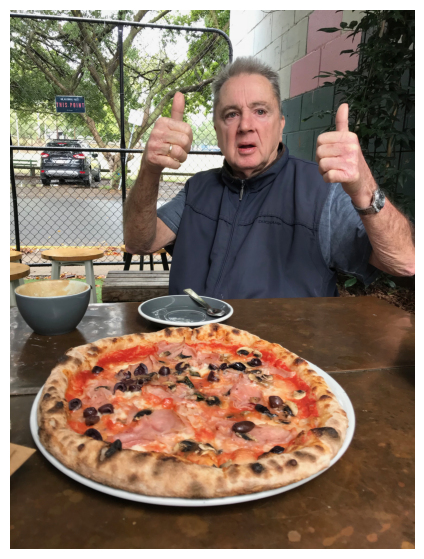

In [31]:
# View the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis(False);

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


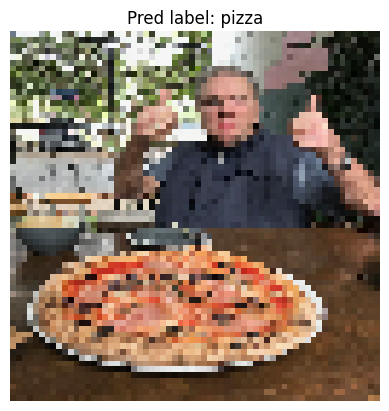

In [32]:
# Make a prediction on the image
model_double_data.eval()
with torch.inference_mode():
  # Get image pixels into float + between 0 and 1
  img = img / 255.

  # Resize image to 64x64
  resize = transforms.Resize((64, 64))
  img = resize(img)

  # Turn image in single batch and pass to target device
  batch = img.unsqueeze(0).to(device)

  # Predict on image
  y_pred_logit = model_double_data(batch)

  # Convert pred logit to pred label
  # pred_label = torch.argmax(torch.softmax(y_pred_logit, dim=1), dim=1)
  pred_label = torch.argmax(y_pred_logit, dim=1) # get same results as above without torch.softmax

# Plot the image and prediction
plt.imshow(img.permute(1, 2, 0))
plt.title(f"Pred label: {class_names[pred_label]}")
plt.axis(False);